## Pytorch Basic Tutorial




### Pytorch & Numpy

- Popular Deep Learning Library
- Numpy의 기능 대부분을 Pytorch에서 사용가능
- Neural Network 학습에 필요한 전반적인 기능을 제공


|                    | Pytorch | Numpy       |
|--------------------|---------|-------------|
| Type Name          | Tensor  | Numpy Array |
| Training Framework | O       | X           |
| GPU Available      | O       | X           |

In [1]:
import torch # not pytorch
import numpy as np
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True' # don't care about this

In [2]:
ls = [1., 2., 3.]
x_torch = torch.tensor(ls)
x_np = np.array(ls)
print("Pytorch");print(x_torch);print(type(x_torch))
print("Numpy");print(x_np);print(type(x_np))

Pytorch
tensor([1., 2., 3.])
<class 'torch.Tensor'>
Numpy
[1. 2. 3.]
<class 'numpy.ndarray'>


In [3]:
# zero values
x_torch = torch.zeros(2,3)
x_np = np.zeros((2,3))
print("Pytorch");print(x_torch)
print("Numpy");print(x_np)

Pytorch
tensor([[0., 0., 0.],
        [0., 0., 0.]])
Numpy
[[0. 0. 0.]
 [0. 0. 0.]]


In [4]:
# sample from normal distribution
x_torch = torch.randn(2,3)
x_np = np.random.randn(2,3)
print("Pytorch");print(x_torch)
print("Numpy");print(x_np)

Pytorch
tensor([[ 0.5323,  0.3302, -0.2700],
        [-0.3987, -1.1482, -0.2492]])
Numpy
[[ 0.15708225  0.94498482  0.70826693]
 [-0.49881921  1.28087801  0.45046728]]


### Pytorch: Dataset Loading
- ImageFolder
- DataLoader
- Torchvision.Transforms

dataset size: 91
image shape: torch.Size([3, 28, 28])
label: tensor([6, 1, 4, 9])
label 0: 6
image 0:


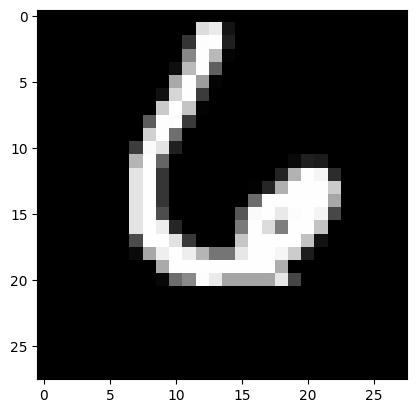

In [5]:
import torch
from torchvision.datasets import ImageFolder
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

transformation = transforms.Compose([
    transforms.ToTensor()
])

# Load from directory
#dataset = ImageFolder('./dataset/')
dataset = ImageFolder('/home/piai/바탕화면/CV/Image_Classification_Segmentation_student/2.DNN+Classification/pytorch_basic/dataset', transformation)
print(f"dataset size: {len(dataset)}")

dataloader = DataLoader(dataset, batch_size=4, shuffle=True)

for data in dataloader:
    # data[0]: image data, data[1]: label
    img = data[0]
    label = data[1]
    print(f"image shape: {img[0].shape}")
    print(f"label: {label}")
    print(f"label 0: {label[0]}")
    print("image 0:")
    plt.imshow(img[0].permute(1,2,0), cmap='gray', interpolation='nearest')
    plt.show()
    break

### Pytorch: Dataset Loading
- torchvision library

/home/piai/anaconda3/envs/cv_2025/lib/python3.8/site-packages/torchvision/datasets/mnist.py:498: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:180.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


dataset size: 60000
image shape: torch.Size([1, 28, 28])
label: tensor([1, 8, 7, 1])
label 0: 1
image 0:


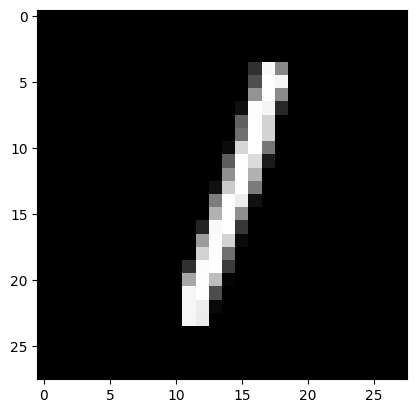

In [6]:
from torchvision.datasets import MNIST
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

# Load from directory
transformation = transforms.Compose([
    transforms.ToTensor()
])

download_root = './MNIST_DATASET'

train_dataset = MNIST(download_root, transform=transformation, train=True, download=True)
print(f"dataset size: {len(train_dataset)}")

batch_size = 4

dataloader = DataLoader(dataset=train_dataset, 
                         batch_size=batch_size,
                         shuffle=True)

for data in dataloader:
    # data[0]: image data, data[1]: label
    img = data[0]
    label = data[1]
    print(f"image shape: {img[0].shape}")
    print(f"label: {label}")
    print(f"label 0: {label[0]}")
    print("image 0:")
    plt.imshow(img[0].permute(1,2,0), cmap='gray', interpolation='nearest')
    plt.show()
    break

### Pytorch: Define Model
- nn.module
- init
- forward


In [7]:
import torch
import torch.nn as nn

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()

    def forward(self, x):
        print('hello world', x)
        
model = Net()
model(-1)
model(2)

hello world -1
hello world 2


In [8]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(120, 84)    

    def forward(self, x):
        print('hello world', x)
        
model = Net()
print(model)

Net(
  (fc1): Linear(in_features=120, out_features=84, bias=True)
)


In [9]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(120, 84)    
        self.fc2 = nn.Linear(120, 84)    

    def forward(self, x):
        print('hello world', x)
        
model = Net()
print(model)


Net(
  (fc1): Linear(in_features=120, out_features=84, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
)


In [10]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(2, 10)      
        self.fc2 = nn.Linear(10, 2)                        
    def forward(self, x):
        x = self.fc1(x)
        # print(x.shape)
        x = nn.ReLU()(x)
        # print(x.shape)
        x = self.fc2(x)
        # print(x.shape)
        return x
    
model = Net()
print(model)
x = torch.randn(16, 2)
y = model(x)
print(y.shape)
# print(y)

Net(
  (fc1): Linear(in_features=2, out_features=10, bias=True)
  (fc2): Linear(in_features=10, out_features=2, bias=True)
)
torch.Size([16, 2])


### Pytorch: backward()
- Optimizer
    - step()
    - zero_grad()

In [11]:
torch.random.manual_seed(1)

w = torch.randn(2, 3).requires_grad_()
x = torch.randn(3)
b = torch.randn(2)
y = torch.randn(2)

loss = (w.matmul(x).add(b).sub(y) ** 2).mean()

print("## Before backward ##")
print(w.grad) # value of gradient

loss.backward()

print("## After backward ##")
print(w.grad) # value of gradient


## Before backward ##
None
## After backward ##
tensor([[ 2.2436, -0.5624,  1.5141],
        [ 2.5045, -0.6277,  1.6901]])


### Pytorch: Optimizer
- step()
- zero_grad()
- Practice

In [12]:
import torch.optim as optim

torch.random.manual_seed(1)

w = torch.randn(2, 3).requires_grad_()
w_init = w.clone()
x = torch.randn(3)
b = torch.randn(2).requires_grad_()
b_init = b.clone()
y = torch.randn(2)

lr = 0.1
optimizer = optim.SGD([w, b], lr=lr)

loss = (w.matmul(x).add(b).sub(y) ** 2).mean()
loss.backward()

print("## Initial w ##")
print(w)
print(b)

print("## Initial grad ##")
print(w.grad)
print(b.grad)

print("## After Step ##")
optimizer.step()
print(w)


print(w_init - lr * w.grad)
print(b)
print(b_init - lr * b.grad)


print("## After zero_grad ##")
optimizer.zero_grad()
print(w.grad)

## Initial w ##
tensor([[ 0.6614,  0.2669,  0.0617],
        [ 0.6213, -0.4519, -0.1661]], requires_grad=True)
tensor([-0.5631, -0.8923], requires_grad=True)
## Initial grad ##
tensor([[ 2.2436, -0.5624,  1.5141],
        [ 2.5045, -0.6277,  1.6901]])
tensor([-1.4734, -1.6447])
## After Step ##
tensor([[ 0.4370,  0.3232, -0.0897],
        [ 0.3709, -0.3891, -0.3351]], requires_grad=True)
tensor([[ 0.4370,  0.3232, -0.0897],
        [ 0.3709, -0.3891, -0.3351]], grad_fn=<SubBackward0>)
tensor([-0.4157, -0.7278], requires_grad=True)
tensor([-0.4157, -0.7278], grad_fn=<SubBackward0>)
## After zero_grad ##
tensor([[0., 0., 0.],
        [0., 0., 0.]])


### appendix
### Pytorch: GPU
- cuda()
- 연산에 사용되는 Tensor들을 cuda() 함수를 사용해서 GPU연산을 사용하도록 설정한다.
- nn.Module을 상속받은 모델도 cuda() 함수를 사용해서 GPU 연산을 사용하도록 설정 가능하다.

In [13]:
import torch
import torch.optim as optim

w = torch.randn(2, 3, requires_grad=True, device="cuda")
x = torch.randn(3).cuda()
b = torch.randn(2, requires_grad=True, device="cuda")
y = torch.randn(2).cuda()

ptimizer = optim.SGD([w, b], lr=0.1)

loss = (w.matmul(x).add(b).sub(y) ** 2).mean()
loss.backward()

optimizer.step()
optimizer.zero_grad()

print(loss.device)

cuda:0


In [14]:
import torch
import torch.optim as optim

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(2, 10)      
        self.fc2 = nn.Linear(10, 2)                        
    def forward(self, x):
        x = self.fc1(x)
        x = nn.ReLU()(x)
        x = self.fc2(x)
        return x
    
model = Net().cuda()

print(model.fc1.weight.device)

cuda:0
